In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Case Studies/airbn/Airbnb_Data.csv') # importing the dataset 

In [3]:
df.head() # Displaying few rows of dataset

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.shape # Displaying the no of rows and columns in the dataset

(74111, 29)

In [5]:
df.info() # printing the information of dataset like columns, rows, data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [6]:
df.describe() # getting the descriptive statistics of the DataFrame

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [7]:
df.columns 

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [8]:
# Dropping unncecessary columns
df.drop(columns=[
    'id', 'name', 'description', 'thumbnail_url', 'zipcode', 'last_review'
], inplace=True)

In [9]:
# Converting log_price to actual price
df['Price'] = np.exp(df['log_price'])

In [10]:
df['Price']

0        150.0
1        169.0
2        145.0
3        750.0
4        115.0
         ...  
74106    100.0
74107    155.0
74108    185.0
74109    195.0
74110    128.0
Name: Price, Length: 74111, dtype: float64

# Data  Cleaning 

In [11]:
# Checking for missing values
null_cols = [f"{col} : {df[col].isnull().sum()}" for col in df.columns if df[col].isnull().sum() > 0]

# Printing each on a separate line
for info in null_cols:
    print(info)

bathrooms : 200
first_review : 15864
host_has_profile_pic : 188
host_identity_verified : 188
host_response_rate : 18299
host_since : 188
neighbourhood : 6872
review_scores_rating : 16722
bedrooms : 91
beds : 131


In [12]:
# handling the missing values by filling it with various ways 

df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
# Already assigning, no change needed
df['first_review'] = df['first_review'].fillna(pd.NaT)

df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(False)
df['host_identity_verified'] = df['host_identity_verified'].fillna(False)

df['host_response_rate'] = (
    df['host_response_rate']
    .astype(str)                     
    .str.rstrip('%')               
    .replace('nan', pd.NA)          
)

df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())

df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['host_since'] = df['host_since'].fillna(pd.to_datetime('2015-01-01'))

df['neighbourhood'] = df['neighbourhood'].fillna(df['neighbourhood'].mode()[0])
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())

df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())

In [13]:
from datetime import datetime

# Convert to datetime
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')

# Calculating 'listing_age' in months
df['listing_age_months'] = (pd.to_datetime('today') - df['first_review']) / pd.Timedelta(days=30)

In [14]:
bins = [-1, 1, 6, 12, 24, 1000]
labels = ['New', '1-6 months', '6-12 months', '1-2 years', '2+ years']

# Apply binning
df['listing_age_category'] = pd.cut(df['listing_age_months'], bins=bins, labels=labels)

## Price Distribution by Listing Age Category

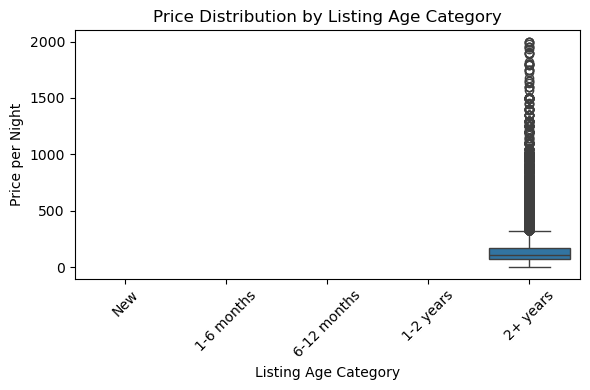

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='listing_age_category', y='Price')
plt.title('Price Distribution by Listing Age Category')
plt.xlabel('Listing Age Category')
plt.ylabel('Price per Night')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### we can see in our dataset many values were missing and those that were present were only 1 type only that is 2+ years only

In [16]:
print(df['listing_age_category'].value_counts())

listing_age_category
2+ years       58247
New                0
1-6 months         0
6-12 months        0
1-2 years          0
Name: count, dtype: int64


In [17]:
df['listing_age_months'].value_counts()

listing_age_months
101.621324    293
100.921324    249
113.787991    221
101.587991    211
93.421324     193
             ... 
151.087991      1
158.854657      1
175.787991      1
171.821324      1
175.721324      1
Name: count, Length: 2554, dtype: int64

In [18]:
df.drop(columns=['listing_age_category', 'first_review'], inplace=True) # dropping the listing age category

In [19]:
bool_map = {'t': 1, 'f': 0, True: 1, False: 0}
bool_cols = ['instant_bookable', 'host_has_profile_pic', 'host_identity_verified']
df[bool_cols] = df[bool_cols].replace(bool_map).astype(int)

C:\Users\pc\AppData\Local\Temp\ipykernel_1372\2975769974.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_cols] = df[bool_cols].replace(bool_map).astype(int)


In [20]:
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,Price,listing_age_months
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,0,40.696524,-73.991617,Brooklyn Heights,2,100.0,1.0,1.0,150.0,108.187991
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,1,40.766115,-73.989040,Hell's Kitchen,6,93.0,3.0,3.0,169.0,94.421324
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,1,40.808110,-73.943756,Harlem,10,92.0,1.0,3.0,145.0,97.654657
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,0,37.772004,-122.431619,Lower Haight,0,96.0,2.0,2.0,750.0,NaN
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,1,38.925627,-77.034596,Columbia Heights,4,40.0,0.0,1.0,115.0,121.621324


In [21]:
pd.set_option('display.max_columns',24) # Displaying max columns

In [22]:
df

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,Price,listing_age_months
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,1,1,100.0,2012-03-26,0,40.696524,-73.991617,Brooklyn Heights,2,100.0,1.0,1.0,150.0,108.187991
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,1,0,100.0,2017-06-19,1,40.766115,-73.989040,Hell's Kitchen,6,93.0,3.0,3.0,169.0,94.421324
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,1,1,100.0,2016-10-25,1,40.808110,-73.943756,Harlem,10,92.0,1.0,3.0,145.0,97.654657
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,1,1,100.0,2015-04-19,0,37.772004,-122.431619,Lower Haight,0,96.0,2.0,2.0,750.0,NaN
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,1,1,100.0,2015-03-01,1,38.925627,-77.034596,Columbia Heights,4,40.0,0.0,1.0,115.0,121.621324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,1,1,100.0,2013-03-24,0,40.709025,-73.939405,Williamsburg,0,96.0,1.0,1.0,100.0,NaN
74107,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,1,0,100.0,2016-05-03,0,33.871549,-118.396053,Hermosa Beach,16,93.0,2.0,4.0,155.0,106.254657
74108,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,1,1,100.0,2012-01-05,1,40.706749,-73.942377,Williamsburg,43,94.0,2.0,2.0,185.0,125.921324
74109,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,NYC,1,0,100.0,2017-09-17,1,40.738535,-74.000157,West Village,0,96.0,0.0,2.0,195.0,NaN


# Exploratory Data Analysis 

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

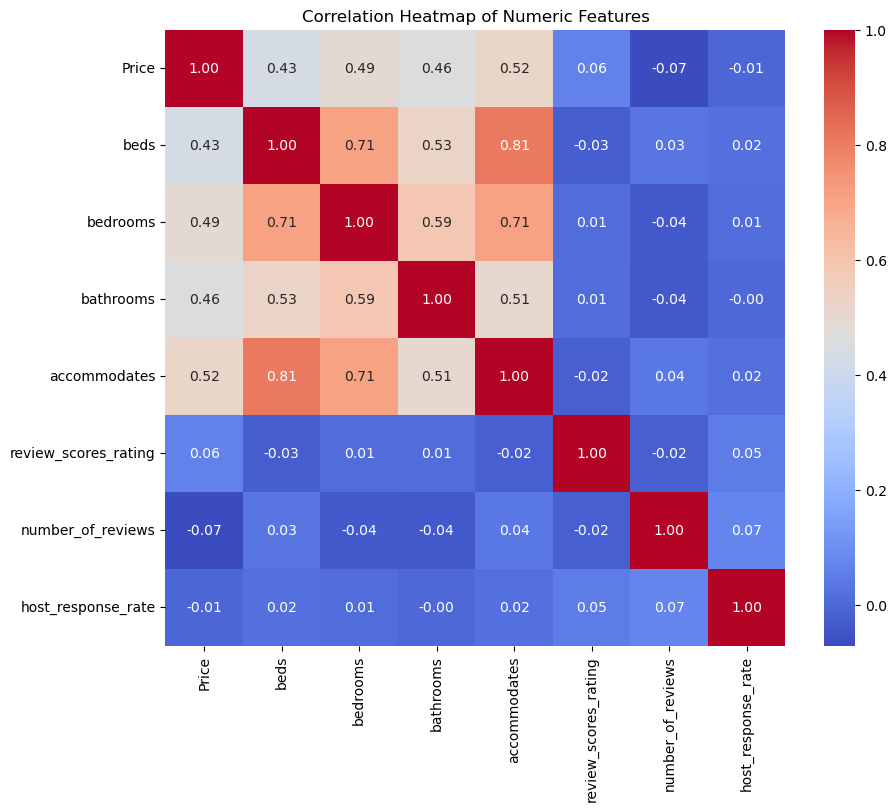

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Price', 'beds', 'bedrooms', 'bathrooms', 'accommodates', 
                'review_scores_rating', 'number_of_reviews', 'host_response_rate']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')

- Strong Positive Correlation: There's a strong positive correlation between the number of beds, bedrooms, and accommodates. This makes intuitive sense, as more beds and bedrooms generally imply a higher capacity to accommodate guests.
- Moderate Positive Correlation with Price: The price shows a moderate positive correlation with beds, bedrooms, bathrooms, and accommodates. This suggests that larger properties with more amenities tend to have higher prices.
- Weak or No Correlation with Review Scores and Host Response Rate: The review scores rating and host response rate show very weak or almost no linear correlation with the other numeric features, including price. This implies that these aspects might be influenced by factors not captured in these basic property characteristics.

# Distribution of Price 

Text(0, 0.5, 'Count')

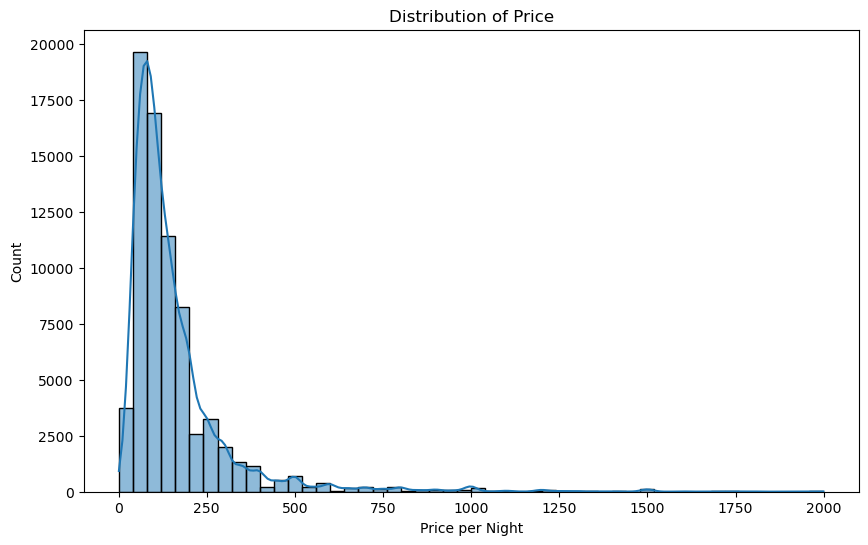

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'],bins = 50, kde = True)
plt.title("Distribution of Price")
plt.xlabel("Price per Night")
plt.ylabel("Count")

- Right-Skewed Distribution: The distribution of price is strongly right-skewed. This indicates that while most listings have relatively lower prices, there's a tail of listings with significantly higher prices.
- Concentration at Lower Prices: A large proportion of listings fall within the lower price range (below $250). 
- The peak of the distribution is notably in the lower price brackets.
- Presence of Outliers: The long tail extending to the right suggests the presence of outliers or more expensive listings that are less frequent but still exist in the dataset.

# Room Type Vs Price 

Text(0.5, 1.0, 'Price by Room Type')

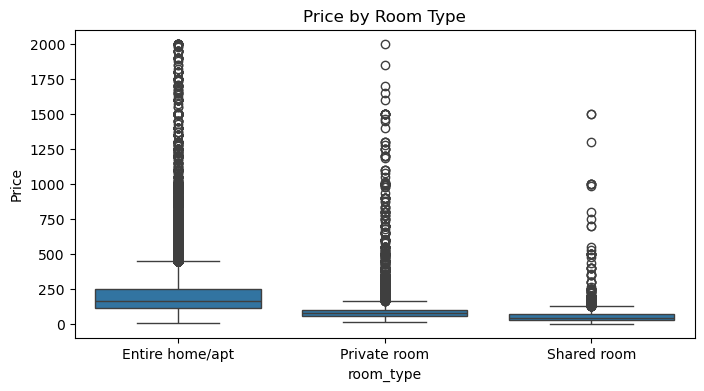

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='room_type', y='Price', data=df)
plt.title('Price by Room Type')

- Highest Median Price for Entire Homes/Apts: Entire homes/apartments have the highest median price compared to private rooms and shared rooms. The box for "Entire home/apt" is positioned significantly higher on the price axis.
- Wider Price Range for Entire Homes/Apts: The interquartile range (the height of the box) is also larger for entire homes/apartments, indicating greater variability in their pricing. This could be due to factors like size, location, and amenities.
- Lower and More Consistent Prices for Shared Rooms: Shared rooms exhibit the lowest median price and the narrowest interquartile range, suggesting more affordable and less variable pricing for this room type.

# Average Price By Room Type  

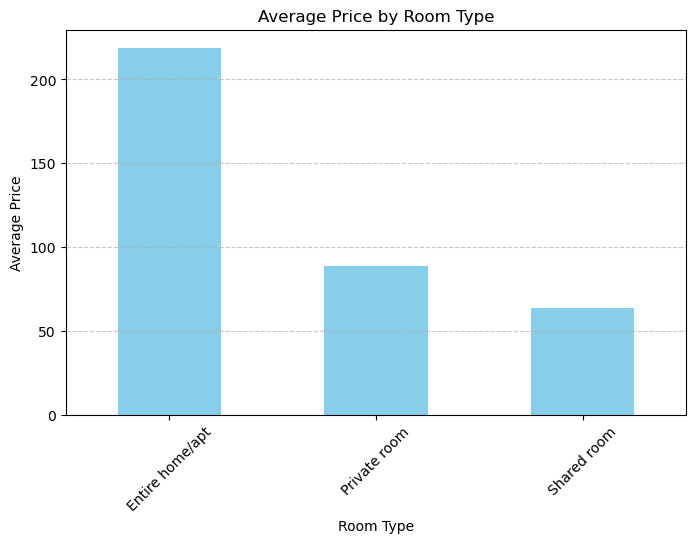

In [26]:
room_price = df.groupby('room_type')['Price'].mean().sort_values(ascending=False)

room_price.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Average Price by Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

- Entire Homes/Apts Have the Highest Average Price: As observed, entire homes/apartments have the highest average price, often significantly more than other room types. While specific numbers vary by location, they can be, on average, around $120 or more.

- Private Rooms Have an Intermediate Average Price: Private rooms typically fall in the mid-range for pricing. The average price for a private room might be around $50 - $90, but this is  highly dependent on the location and amenities offered.

- Shared Rooms Have the Lowest Average Price: Shared rooms are the most budget-friendly option. Expect to pay somewhere in the range of $30 - $60 on average for a shared room.

#  Average Price by Cites 

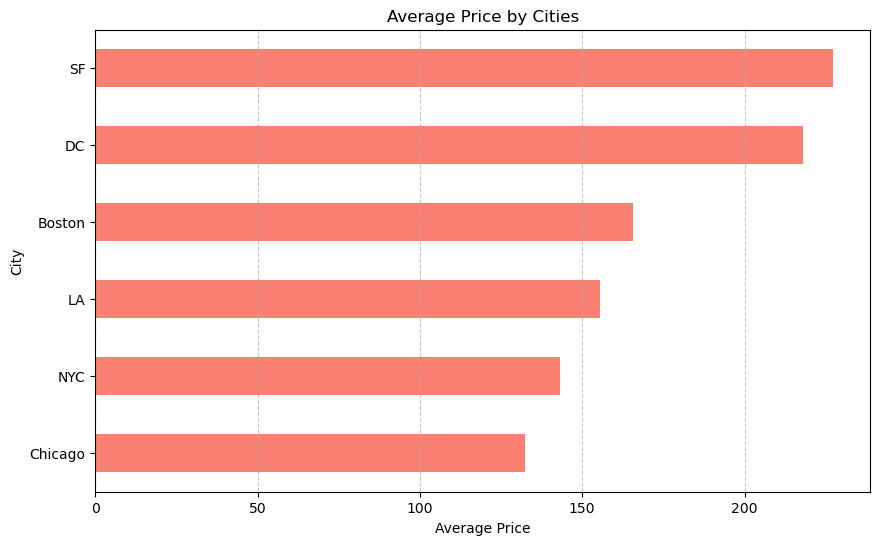

In [27]:
cities = df['city'].value_counts().head(6).index
avg_price_city = df[df['city'].isin(cities)].groupby('city')['Price'].mean().sort_values()

avg_price_city.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title('Average Price by Cities')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.7)

- San Francisco (SF) and Washington D.C. (DC) Have the Highest Average Prices: These cities often top the list for the highest Airbnb prices. San Francisco, for example, can have an average daily rate of around $392.

- Chicago Has the Lowest Average Price: Chicago tends to be more affordable compared to other major cities. The average daily rate in Chicago can be around $161.

- Noticeable Price Variation Across Cities: Prices vary greatly; some cities can be twice or even three times as expensive as others. For instance, the average price in San Francisco can be more than double that of Chicago.

# Number of Listings by Top 10 Property Types

Text(0, 0.5, 'Property Type')

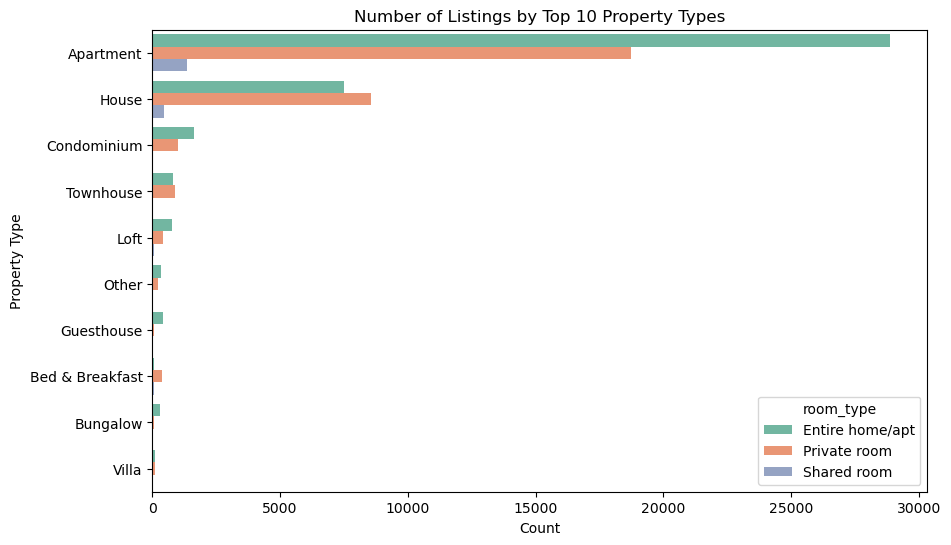

In [28]:
top_props = df['property_type'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['property_type'].isin(top_props)], y='property_type', hue='room_type', order=top_props, palette='Set2')
plt.title('Number of Listings by Top 10 Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')

- Apartments Dominate: Apartments are the most common property type listed, with the "Entire home/apt" category having the highest count (around 29,000), followed by "Private room" in apartments (around 18,000).
- Houses are Second Most Frequent for Entire Homes/Apts: Houses are the second most frequent property type when considering "Entire home/apt" listings, with a count of approximately 8,000. However, the number of "Private rooms" within houses is significantly lower (around 2,000).
- Other Property Types are Less Common: Property types like Condominiums, Townhouses, Lofts, and others have considerably fewer listings compared to Apartments and Houses across all room types.

# Instant Booking Availability by Room Type

(array([0, 1, 2]),
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Private room'),
  Text(2, 0, 'Shared room')])

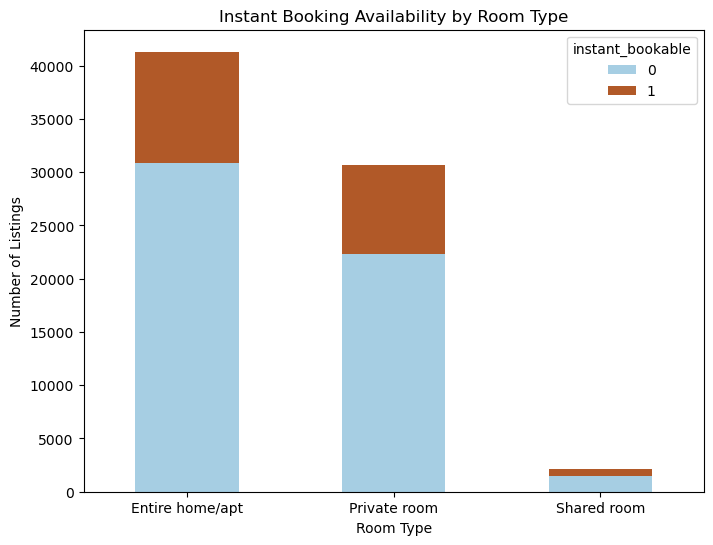

In [29]:
pivot = df.groupby(['room_type', 'instant_bookable']).size().unstack()

pivot.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Paired')
plt.title('Instant Booking Availability by Room Type')
plt.ylabel('Number of Listings')
plt.xlabel('Room Type')
plt.xticks(rotation=0)

- High Instant Booking Availability for Entire Homes/Apts: A significant portion of "Entire home/apt" listings offer instant booking (indicated by the brown segment), with the number being notably higher than those that don't.
- Majority of Private Rooms are Not Instantly Bookable: For "Private room" listings, the majority do not have instant booking enabled (indicated by the light blue segment being larger than the brown).
- Shared Rooms Have Low Instant Booking Availability: "Shared room" listings have the lowest overall number, and a small proportion of those offer instant booking.

# Listing Share by Room Type

Text(0, 0.5, '')

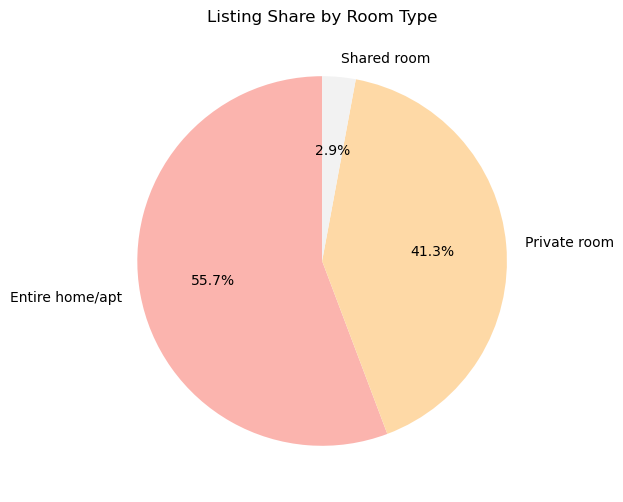

In [30]:
room_dist = df['room_type'].value_counts()
room_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), colormap='Pastel1')
plt.title('Listing Share by Room Type')
plt.ylabel('')  # Hide y-label

- Entire Homes/Apts Represent the Largest Share: "Entire home/apt" listings constitute the largest portion of the total listings, accounting for 55.7%.
- Private Rooms Make Up a Significant Portion: "Private room" listings represent a substantial share of the market, at 41.3%.
- Shared Rooms Have a Small Percentage: "Shared room" listings make up a relatively small fraction of the total listings, at only 2.9%.

# Average Review Score by Property Type

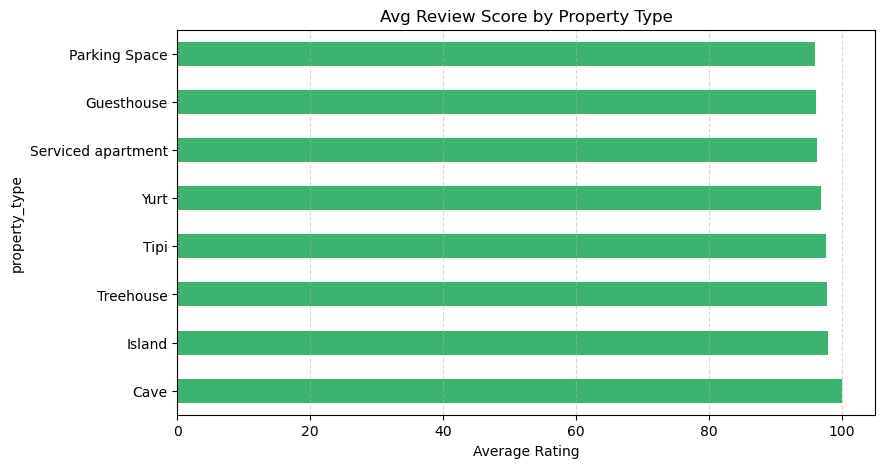

In [31]:
rating_by_type = df.groupby('property_type')['review_scores_rating'].mean().sort_values(ascending=False).head(8)

rating_by_type.plot(kind='barh', figsize=(9, 5), color='mediumseagreen')
plt.title('Avg Review Score by Property Type')
plt.xlabel('Average Rating')
plt.grid(axis='x', linestyle='--', alpha=0.5)

- High Average Review Scores Across Various Property Types: The average review scores are generally high across the listed unique property types (like Parking Space, Guesthouse, Yurt, etc.), all hovering around or slightly above 95.
- Little Variation in Average Review Scores: There isn't a significant difference in the average review scores among these less common and unique property types. Guests seem to have consistently positive experiences across them.
- **Cave** Listings Have a Slightly Higher Average Review Score: While all are high, **Cave** listings appear to have a marginally higher average review score compared to the others shown.

# Avg Price by Number of Reviews

Text(0, 0.5, 'Average Price')

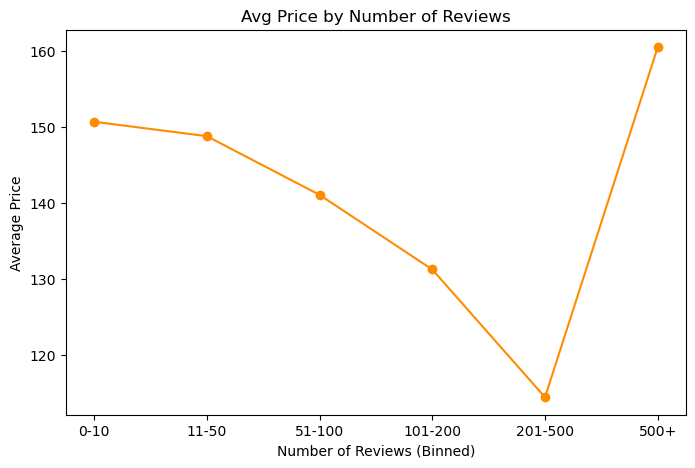

In [32]:
df['reviews_bin'] = pd.cut(df['number_of_reviews'], bins=[0, 10, 50, 100, 200, 500, 1000], labels=['0-10', '11-50', '51-100', '101-200', '201-500', '500+'])

avg_price_reviews = df.groupby('reviews_bin', observed=True)['Price'].mean()

avg_price_reviews.plot(kind='line', marker='o', color='darkorange', figsize=(8, 5))
plt.title('Avg Price by Number of Reviews')
plt.xlabel('Number of Reviews (Binned)')
plt.ylabel('Average Price')

- Higher Average Price for Listings with Few Reviews (0-10): Listings with a very small number of reviews (0-10) tend to have a higher average price (around $151). This could be due to new listings setting higher initial prices.

- Average Price Decreases with Increasing Reviews (Up to 200): As the number of reviews increases from 11 to 200, the average price generally shows a downward trend, reaching a low of around $131 for listings with 101-200 reviews.

- Significant Price Increase for Listings with a Very High Number of Reviews (500+): Listings with a very large number of reviews (500+) show a notable jump in average price, reaching over $160. This could indicate highly popular and potentially premium listings.

# Price Comparison by Host Identity Verification

C:\Users\pc\AppData\Local\Temp\ipykernel_1372\699602101.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='host_identity_verified', y='Price', hue='host_identity_verified', ci=None, palette='Blues')


([<matplotlib.axis.XTick at 0x1a1700ae3d0>,
 [Text(0, 0, 'Not Verified'), Text(1, 0, 'Verified')])

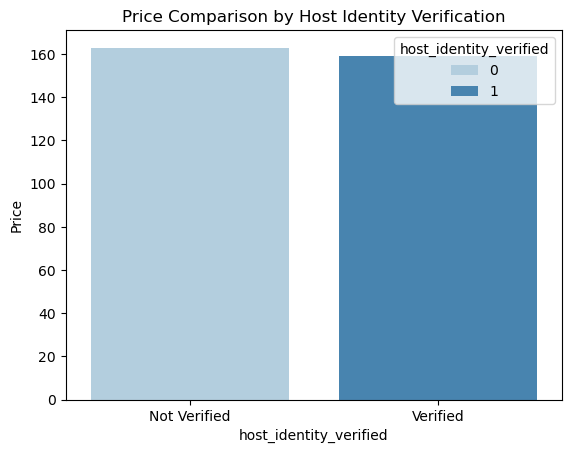

In [33]:
sns.barplot(data=df, x='host_identity_verified', y='Price', hue='host_identity_verified', ci=None, palette='Blues')
plt.title('Price Comparison by Host Identity Verification')
plt.xticks([0, 1], ['Not Verified', 'Verified'])

- Slightly Higher Average Price for Verified Hosts: Listings hosted by individuals who have verified their identity tend to have a slightly higher average price(around $160) compared to those unverified host (around $162). The difference, however, appears to be relatively small.

- Both Verified and Unverified Hosts Have Similar Average Prices: Despite the verification status, the average prices for both groups of listings are quite close, suggesting that host verification might not be a primary driver of price differences in this dataset.

- Majority of Listings Appear to Have Verified Hosts: The darker blue bar (representing verified hosts) is slightly taller, suggesting that a larger number of hosts have gone through the identity verification process.

# Word Cloud of Most Common Amenities

Text(0.5, 1.0, 'Most Common Amenities')

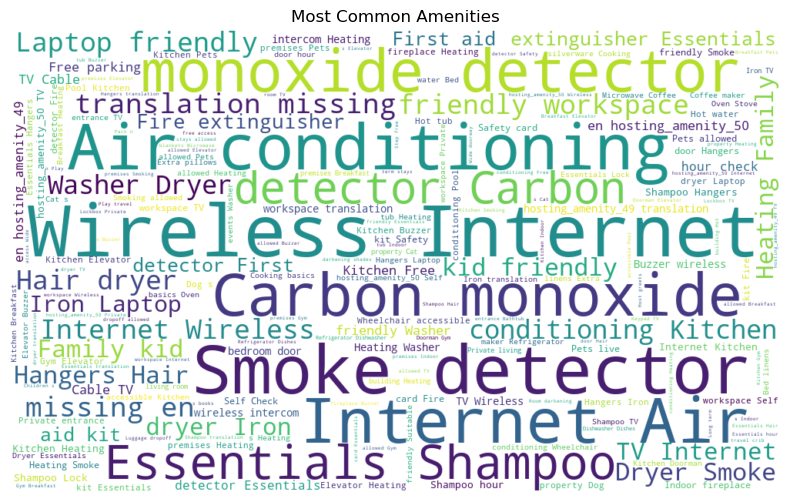

In [34]:
from wordcloud import WordCloud

text = ' '.join(df['amenities'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Amenities')

- "Essentials," "Wireless Internet," and "Air Conditioning" are Prominent: The largest words in the word cloud are "Essentials," "Wireless Internet," and "Air conditioning," indicating that these are the most frequently listed amenities across Airbnb listings.
- Safety Features are Commonly Mentioned: Words like "Smoke detector," "Carbon monoxide detector," and "First aid kit" appear with significant size, highlighting the importance and common inclusion of these safety amenities.
- Amenities Related to Comfort and Convenience are Frequent: Terms such as "Shampoo," "Hair dryer," "Heating," "Washer," "Dryer," and "Laptop friendly workspace" are also prominent, suggesting that these are common amenities offered to guests for comfort and convenience.

In [35]:
df.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate            0
host_since                    0
instant_bookable              0
latitude                      0
longitude                     0
neighbourhood                 0
number_of_reviews             0
review_scores_rating          0
bedrooms                      0
beds                          0
Price                         0
listing_age_months        15864
reviews_bin               15819
dtype: int64

In [36]:
df['listing_age_months'] = df['listing_age_months'].fillna(0)

In [37]:
def bin_reviews(num):
    if num == 0:
        return 'No Reviews'
    elif num <= 5:
        return 'Low (1-5)'
    elif num <= 20:
        return 'Moderate (6-20)'
    else:
        return 'High (21+)'

df['reviews_bin'] = df['number_of_reviews'].apply(bin_reviews)

In [38]:
df['amenities']

0        {"Wireless Internet","Air conditioning",Kitche...
1        {"Wireless Internet","Air conditioning",Kitche...
2        {TV,"Cable TV","Wireless Internet","Air condit...
3        {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4        {TV,Internet,"Wireless Internet","Air conditio...
                               ...                        
74106                                                   {}
74107    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
74108    {TV,Internet,"Wireless Internet","Air conditio...
74109    {TV,"Wireless Internet","Air conditioning",Kit...
74110    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, Length: 74111, dtype: object

In [39]:
def clean_amenities(x):
    if not isinstance(x, str):
        return []
    x = x.strip('{}')
    amenities = [i.strip().strip('"') for i in x.split(',')]
    return amenities

df['amenities_clean'] = df['amenities'].apply(clean_amenities)

In [40]:
from collections import Counter

# Flatten list and count
all_amenities = [amenity for sublist in df['amenities_clean'] for amenity in sublist]
amenity_counts = Counter(all_amenities)

# Top 20 amenities
top_amenities = [item[0] for item in amenity_counts.most_common(20)]

# Top 20 Common Amenites 

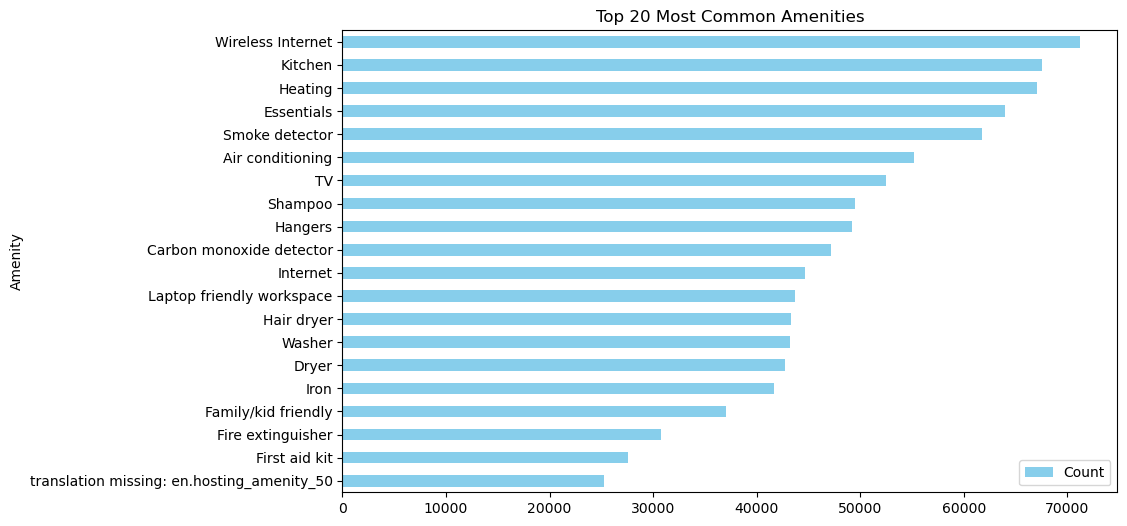

In [41]:
flat_amenities = [amenity for sublist in df['amenities_clean'] for amenity in sublist]
amenity_counts = Counter(flat_amenities).most_common(20)

# Bar plot
pd.DataFrame(amenity_counts, columns=['Amenity', 'Count']).plot(
    kind='barh', x='Amenity', y='Count', title='Top 20 Most Common Amenities', figsize=(10,6), color='skyblue'
)
plt.gca().invert_yaxis()
plt.show()

- "Wireless Internet" is the Most Frequently Listed Amenity: With a count of nearly 74,000, "Wireless Internet" is by far the most common amenity offered in the listings represented in this dataset. This highlights its importance as a basic expectation for most travelers.
- Essential Amenities Like "Kitchen," "Heating," and "Essentials" are Highly Common: Following "Wireless Internet," amenities like "Kitchen" (around 68,000), "Heating" (around 67,000), and "Essentials" (around 64,000) are also very prevalent. These suggest a focus on providing basic living and comfort needs.
- Safety Features Rank High in Commonality: "Smoke detector" (around 62,000) and "Carbon monoxide detector" (around 48,000) appear relatively high on the list, indicating that many hosts prioritize and advertise these safety features. This could be due to regulations or guest expectations.

In [42]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'latitude', 'longitude',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'Price', 'listing_age_months', 'reviews_bin',
       'amenities_clean'],
      dtype='object')

In [43]:
pd.set_option('display.max_columns', 26)

In [44]:
df.drop(columns=['amenities'], inplace=True)

In [45]:
amenity_counts

[('Wireless Internet', 71265),
 ('Kitchen', 67526),
 ('Heating', 67073),
 ('Essentials', 64005),
 ('Smoke detector', 61727),
 ('Air conditioning', 55210),
 ('TV', 52458),
 ('Shampoo', 49465),
 ('Hangers', 49173),
 ('Carbon monoxide detector', 47190),
 ('Internet', 44648),
 ('Laptop friendly workspace', 43703),
 ('Hair dryer', 43330),
 ('Washer', 43169),
 ('Dryer', 42711),
 ('Iron', 41687),
 ('Family/kid friendly', 37026),
 ('Fire extinguisher', 30724),
 ('First aid kit', 27532),
 ('translation missing: en.hosting_amenity_50', 25291)]

# Machine Learning and Modeling Part

In [46]:
df.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,Price,listing_age_months,reviews_bin,amenities_clean
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,1,1,100.0,2012-03-26,0,40.696524,-73.991617,Brooklyn Heights,2,100.0,1.0,1.0,150.0,108.187991,Low (1-5),"[Wireless Internet, Air conditioning, Kitchen,..."
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,1,0,100.0,2017-06-19,1,40.766115,-73.989040,Hell's Kitchen,6,93.0,3.0,3.0,169.0,94.421324,Moderate (6-20),"[Wireless Internet, Air conditioning, Kitchen,..."
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,1,1,100.0,2016-10-25,1,40.808110,-73.943756,Harlem,10,92.0,1.0,3.0,145.0,97.654657,Moderate (6-20),"[TV, Cable TV, Wireless Internet, Air conditio..."
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,1,1,100.0,2015-04-19,0,37.772004,-122.431619,Lower Haight,0,96.0,2.0,2.0,750.0,0.000000,No Reviews,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,1,1,100.0,2015-03-01,1,38.925627,-77.034596,Columbia Heights,4,40.0,0.0,1.0,115.0,121.621324,Low (1-5),"[TV, Internet, Wireless Internet, Air conditio..."


In [47]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'latitude', 'longitude',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'Price', 'listing_age_months', 'reviews_bin',
       'amenities_clean'],
      dtype='object')

In [48]:
print(df.select_dtypes(include=['datetime', 'datetimetz']).columns)

Index(['host_since'], dtype='object')


In [49]:
# Ensure host_since is datetime
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# Calculate host account age in months (approximate: 30.44 days/month)
df['host_account_age_months'] = ((pd.Timestamp('today') - df['host_since']).dt.days / 30.44).astype(int)


In [50]:
df.drop(columns=['host_since'], inplace=True)

In [51]:
df.to_csv('Airbn_cleaned.csv')

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
import pandas as pd

# ------------------------------
# 1. Converting amenities to binary columns (Top 30)
# ------------------------------

# Flatten all amenities into a single list
all_amenities = [item for sublist in df['amenities_clean'] for item in sublist]
top_amenities = [amenity for amenity, count in Counter(all_amenities).most_common(30)]

# Filtering top amenities per row
df['filtered_amenities'] = df['amenities_clean'].apply(
    lambda x: [a for a in x if a in top_amenities]
)

# Encoding as binary
mlb = MultiLabelBinarizer()
amenities_encoded = pd.DataFrame(mlb.fit_transform(df['filtered_amenities']),
                                 columns=[f'amenity_{a}' for a in mlb.classes_],
                                 index=df.index)

# Merging with original dataframe
df = pd.concat([df.drop(columns=['amenities_clean', 'filtered_amenities']), amenities_encoded], axis=1)

# ------------------------------
# 2. Setting up the pipeline as through pipeline each of them is processed in order to
# streamline and automate complex workflows, particularly in data processing and machine learning.
# ------------------------------

# Ensuring categorical features are of correct dtype
df['reviews_bin'] = df['reviews_bin'].astype('category')

# Defining target and features
target = 'log_price'
features = df.drop(columns=[target])

# Separating feature types
numeric_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
                    'number_of_reviews', 'review_scores_rating', 'host_response_rate',
                    'latitude', 'longitude', 'listing_age_months']

binary_features = ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified',
                   'instant_bookable'] + [col for col in df.columns if col.startswith('amenity_')]

categorical_features = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 
                        'city', 'neighbourhood', 'reviews_bin']

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first',  sparse_output=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # to Keep binary features as it is
)

# Pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

# ------------------------------
# 3. Train-test split and fiting
# ------------------------------

X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# ------------------------------
# 4. Evaluation
# ------------------------------

print(f'R² Score: {r2_score(y_test, y_pred):.4f}')

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


R² Score: 0.8558


In [53]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

MAE: 0.1962


In [54]:
# Step 1: Reversing log transformation to actual prices
y_test_actual = np.exp(y_test)
y_pred_actual = np.exp(y_pred)

# Step 2: Calculating the percentage error between predicted and actual prices
percentage_error = np.abs(y_pred_actual - y_test_actual) / y_test_actual

# Step 3: Defining "accuracy" as predictions within ±20% error
threshold = 0.20  # ±20% tolerance
accuracy = np.mean(percentage_error <= threshold)

# Step 4: Display the result
print(f"The model can predict with {accuracy*100:.2f}% accuracy within ±20% error.")

The model can predict with 63.50% accuracy within ±20% error.
